In [73]:

from sqlalchemy import create_engine
from config import rds_port, rds_username, rds_password, rds_endpoint

hostname = rds_endpoint
port = rds_port
username =rds_username
password = rds_password  
database_name = 'cardio_train'

engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{hostname}:{port}/{database_name}')
connection = engine.connect()


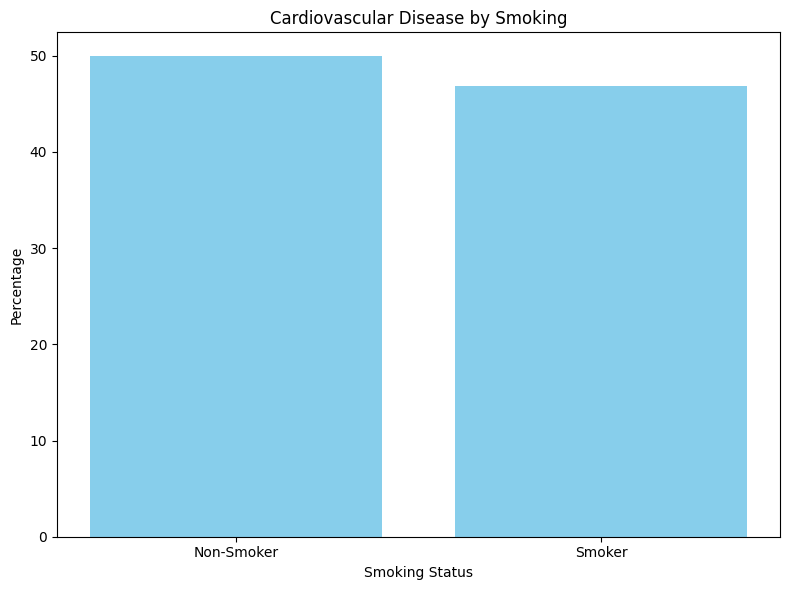

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

query = """
    SELECT 
        smoke, 
        AVG(cardio) * 100 AS cardio_percentage
    FROM 
        cardio_train
    GROUP BY 
        smoke
"""

smoking_proportions = pd.read_sql(query, connection)


fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(smoking_proportions['smoke'], smoking_proportions['cardio_percentage'], color='skyblue', label='Percentage')
ax.set_title('Cardiovascular Disease by Smoking')
ax.set_ylabel('Percentage')
ax.set_xlabel('Smoking Status')
ax.set_xticks(smoking_proportions['smoke'])
ax.set_xticklabels(['Non-Smoker', 'Smoker'], rotation=0)

plt.tight_layout()
plt.show()

In [75]:
print(smoking_proportions)

   smoke  cardio_percentage
0      0            49.9340
1      1            46.8468


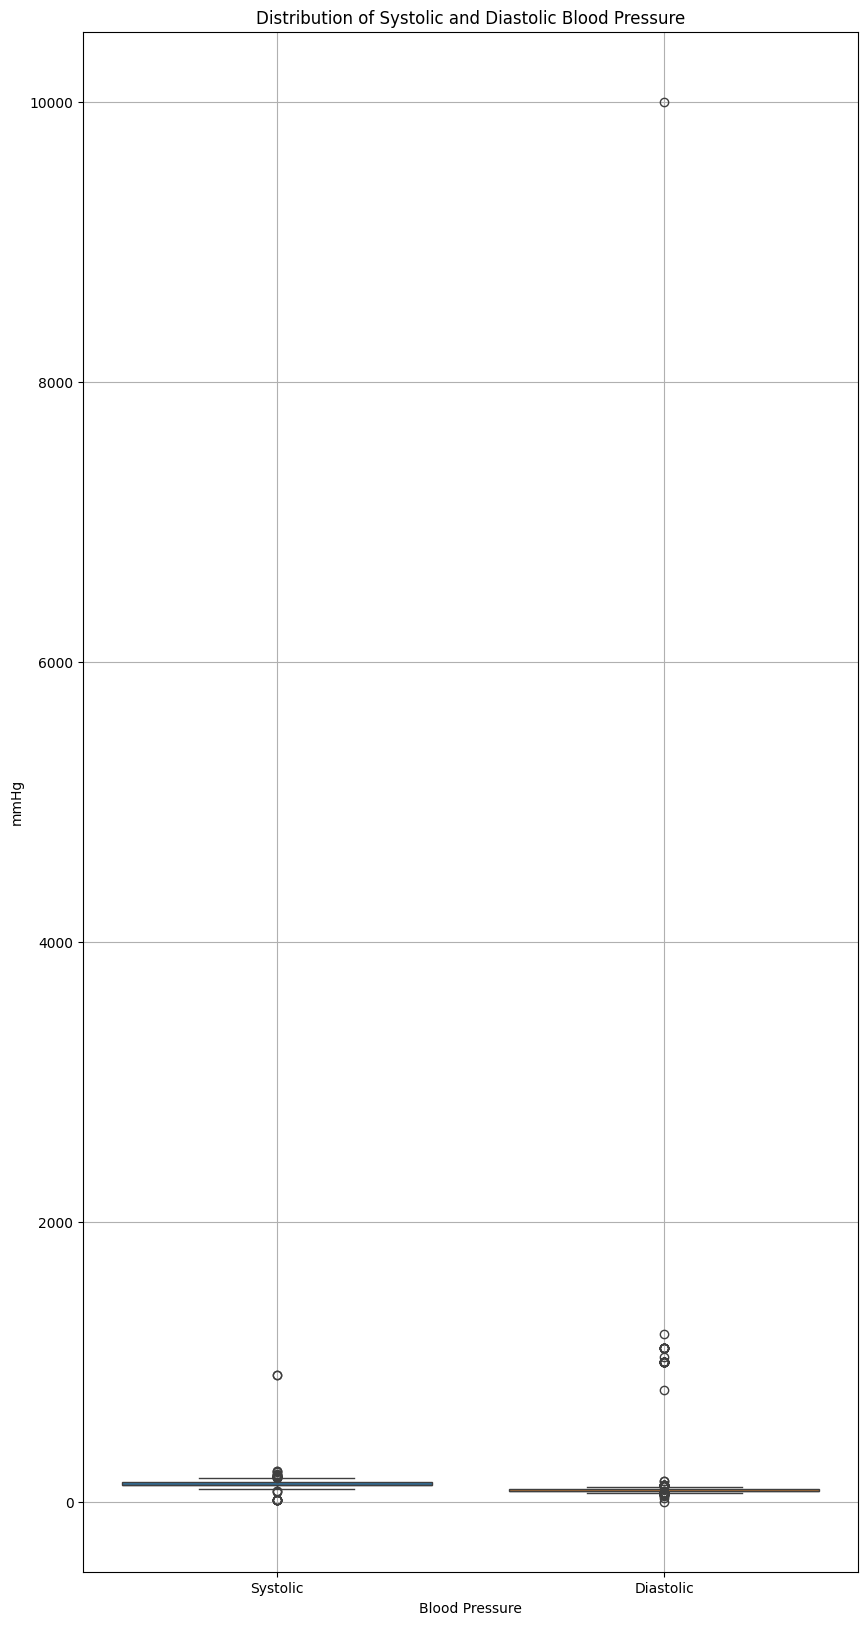

In [82]:
import seaborn as sns

query_blood_pressure = """
    SELECT 
        ap_hi AS systolic_bp,
        ap_lo AS diastolic_bp,
        cardio AS cardiovascular_issue
    FROM 
        cardio_train
"""


blood_pressure_df = pd.read_sql_query(query_blood_pressure, engine)

# Close the database connection
connection.close()

# Create a box plot using Seaborn
plt.figure(figsize=(10, 20))
sns.boxplot(data=blood_pressure_df[['systolic_bp', 'diastolic_bp']])
plt.title('Distribution of Systolic and Diastolic Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('mmHg')
plt.xticks(ticks=[0, 1], labels=['Systolic', 'Diastolic'])

# Show the plot
plt.grid(True)
plt.show()
